<a href="https://colab.research.google.com/github/chibipaper/ai/blob/main/ML_lineareg_Keras_ANN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['trainOriginal.csv']))

# Drop Id Column
# df.drop(df.columns[0], axis=1, inplace=True)

# Dataset is now stored in a Pandas Dataframe

df.head()

Saving trainOriginal.csv to trainOriginal (3).csv


,Id,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
0,1,1Fam,7,1710,548,208500
1,2,1Fam,6,1262,460,181500
2,3,1Fam,7,1786,608,223500
3,4,1Fam,7,1717,642,140000
4,5,1Fam,8,2198,836,250000


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Drop Id Column
# df.drop(df.columns[0], axis=1, inplace=True)

# Dataset is now stored in a Pandas Dataframe

df_test

Saving test.csv to test (1).csv


,Id,BldgType,OverallQual,GrLivArea,GarageArea
0,1202,1Fam,7,1779,546
1,1203,1Fam,5,1348,216
2,1204,1Fam,7,1630,451
3,1205,1Fam,5,1074,495
4,1206,1Fam,7,2196,701
...,...,...,...,...,...
254,1456,1Fam,6,1647,460
255,1457,1Fam,6,2073,500
256,1458,1Fam,7,2340,252
257,1459,1Fam,5,1078,240


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
OverallQual,1000.0,6.125,1.383217,1.0,5.00,6.0,7.00,10.0
GrLivArea,1000.0,1510.493,512.296179,334.0,1125.75,1456.0,1774.25,4676.0
GarageArea,1000.0,473.350,208.901597,0.0,338.00,480.0,576.00,1390.0
SalePrice,1000.0,182284.451,80291.215207,34900.0,130000.00,163995.0,215000.00,755000.0


In [ ]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,259.0,1331.000000,74.911058,1202.0,1266.5,1331.0,1395.5,1460.0
OverallQual,259.0,6.081081,1.379947,3.0,5.0,6.0,7.0,10.0
GrLivArea,259.0,1548.030888,560.911287,630.0,1148.0,1513.0,1844.0,5642.0
GarageArea,259.0,475.467181,219.228602,0.0,336.0,484.0,574.0,1418.0


In [ ]:
train_dataset = df.copy()
train_dataset.tail()

,BldgType,OverallQual,GrLivArea,GarageArea,SalePrice
995,1Fam,4,1230,305,121600
996,1Fam,5,1050,368,136500
997,1Fam,6,1442,615,185000
998,1Fam,3,1077,210,91000
999,1Fam,7,1208,632,206000


In [ ]:
train_dataset.isna().sum()

BldgType       0
OverallQual    0
GrLivArea      0
GarageArea     0
SalePrice      0
dtype: int64

In [ ]:
train_dataset = train_dataset.dropna()

In [ ]:
# one hot encoding of BldgType
train_dataset = pd.get_dummies(train_dataset, prefix=['BldgType'])
train_dataset

,OverallQual,GrLivArea,GarageArea,SalePrice,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI
0,7,1710,548,208500,1,0,0,0,0
1,6,1262,460,181500,1,0,0,0,0
2,7,1786,608,223500,1,0,0,0,0
3,7,1717,642,140000,1,0,0,0,0
4,8,2198,836,250000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
995,4,1230,305,121600,1,0,0,0,0
996,5,1050,368,136500,1,0,0,0,0
997,6,1442,615,185000,1,0,0,0,0
998,3,1077,210,91000,1,0,0,0,0


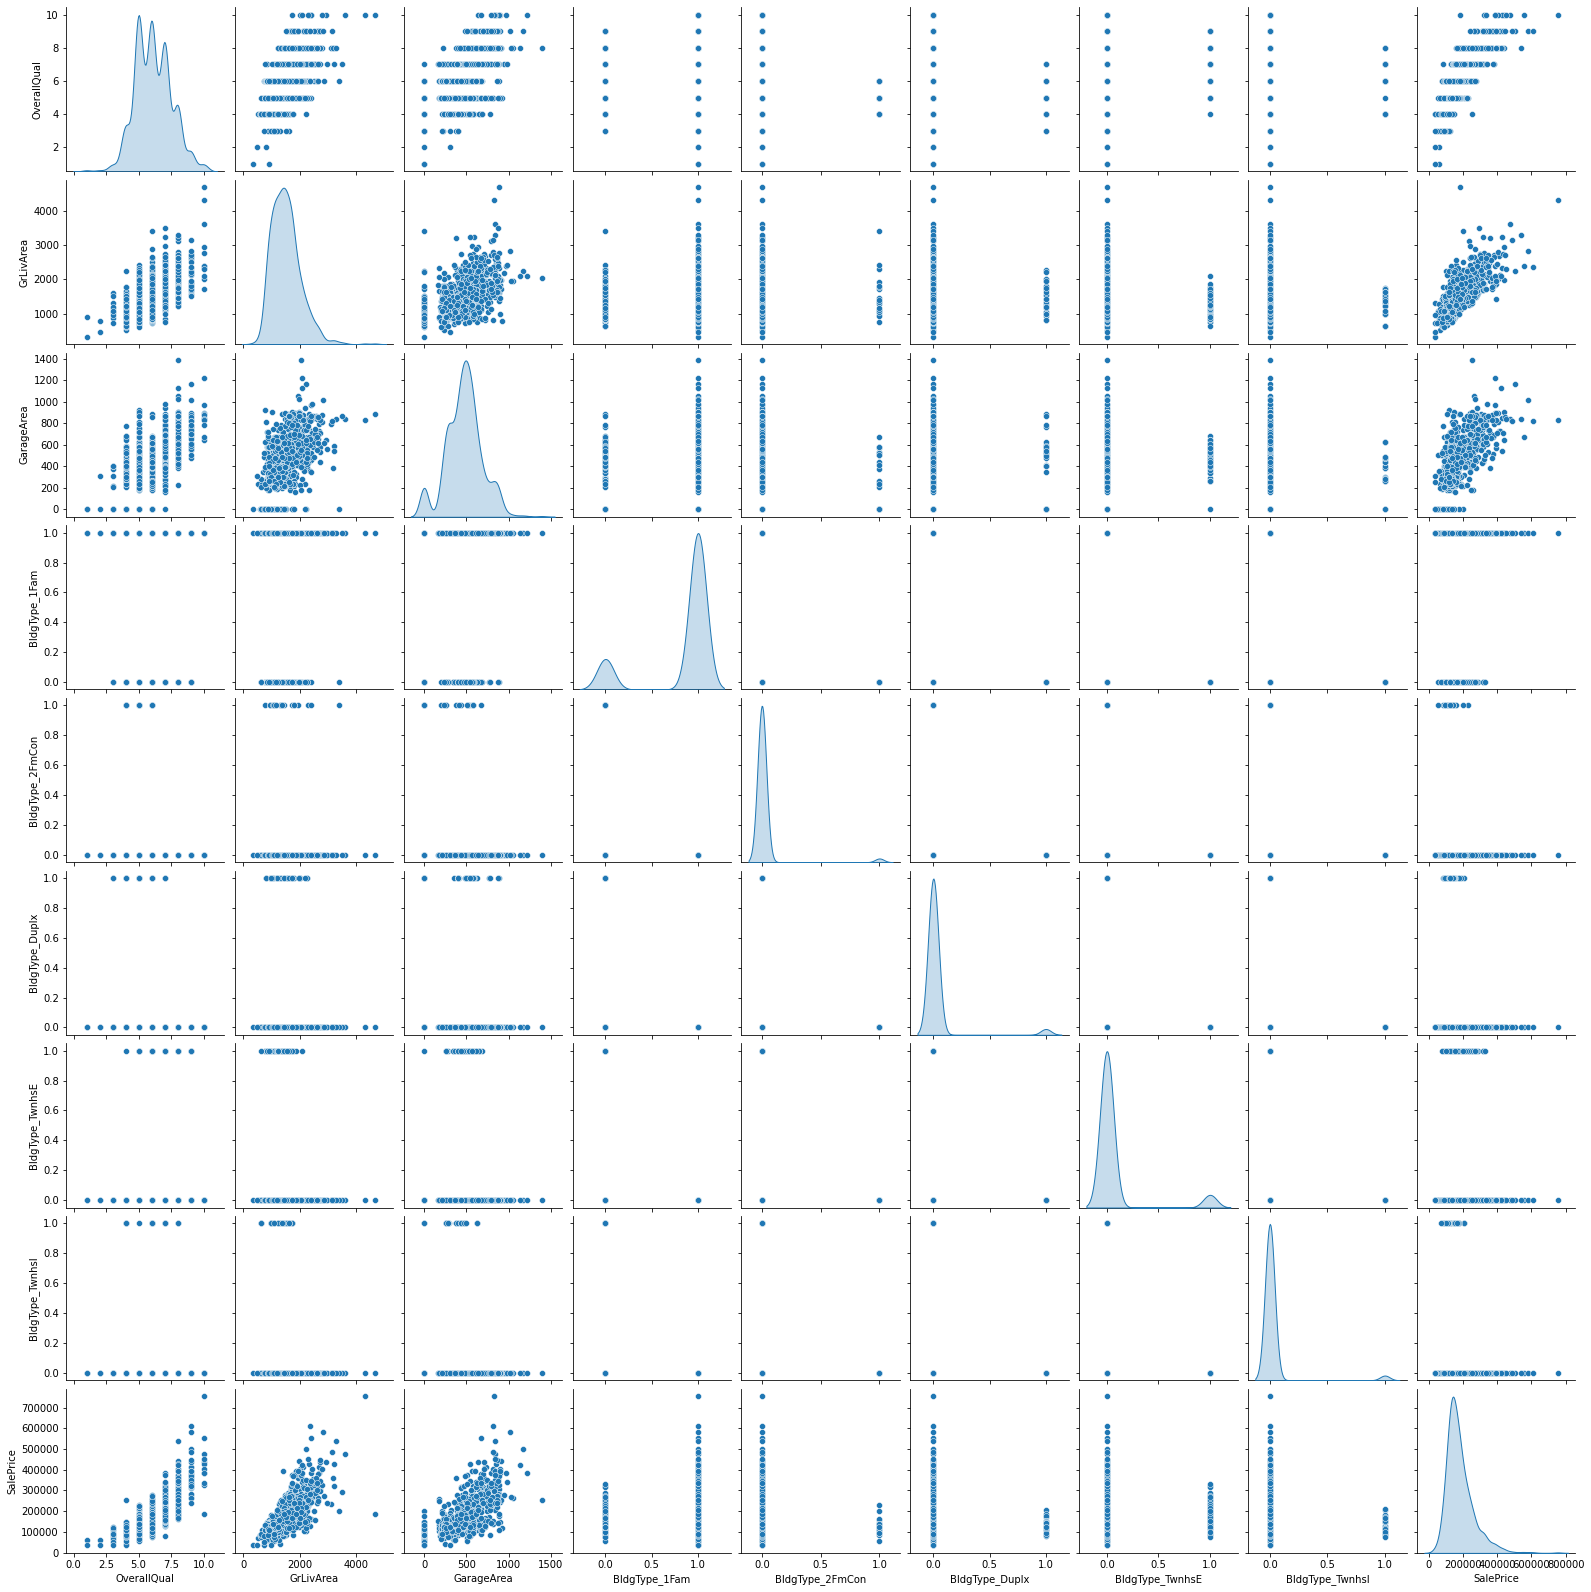

In [ ]:
sns.pairplot(train_dataset[['OverallQual', 'GrLivArea', 'GarageArea', 'BldgType_1Fam', 'BldgType_2FmCon', 'BldgType_Duplx', 'BldgType_TwnhsE', 'BldgType_TwnhsI','SalePrice']], diag_kind='kde')
# sns.pairplot(train_dataset[['BldgType', 'OverallQual', 'GrLivArea', 'GarageArea','SalePrice','Id']], diag_kind='kde')

In [ ]:
# split training data into train and test data
from sklearn.model_selection import train_test_split

X = train_dataset
Y = train_dataset.pop("SalePrice")
train_features, test_features, train_labels, test_labels = train_test_split( X, Y, test_size=0.2, random_state=2) #shufflebool, default=True, data is shuffled before splitting


In [ ]:
train_features

,OverallQual,GrLivArea,GarageArea,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI
175,6,2158,576,1,0,0,0,0
818,6,1052,440,1,0,0,0,0
677,5,792,240,1,0,0,0,0
952,5,768,396,1,0,0,0,0
200,4,1121,440,1,0,0,0,0
...,...,...,...,...,...,...,...,...
534,8,1414,403,1,0,0,0,0
584,4,1573,240,1,0,0,0,0
493,5,1269,308,1,0,0,0,0
527,9,2713,858,1,0,0,0,0


In [ ]:
train_dataset.describe().transpose()
# print(train_dataset)

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
OverallQual,6.125,1.383217
GrLivArea,1510.493,512.296179
GarageArea,473.350,208.901597
BldgType_1Fam,0.837,0.369550
BldgType_2FmCon,0.023,0.149978
BldgType_Duplx,0.036,0.186383
BldgType_TwnhsE,0.075,0.263523
BldgType_TwnhsI,0.029,0.167890


In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
# print(normalizer.mean.numpy())
normalizer

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   6 2158  576    1    0    0    0    0]]

Normalized: [[-0.08  1.3   0.5   0.44 -0.15 -0.19 -0.28 -0.18]]


In [ ]:
linear_model = tf.keras.Sequential([
    normalizer, 
    layers.Dense(units=1) #tanh , sigmoid , reLu
])

linear_model.summary()

In [ ]:
linear_model.layers[1].kernel

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error',
    metrics=['mean_squared_error'])

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=3000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 5min 3s, sys: 22.8 s, total: 5min 26s
Wall time: 3min 35s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([20000, 35000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = linear_model.evaluate(test_features, test_labels, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = linear_model.predict(test_features)
print("predictions shape:", predictions.shape)

Evaluate on test data
2/2 [==============================] - 0s 3ms/step - loss: 21538.1699 - mean_squared_error: 1165723648.0000 - acc: 0.0000e+00
test loss, test acc: [21538.169921875, 1165723648.0, 0.0]
Generate predictions for 3 samples
predictions shape: (200, 1)


In [ ]:
import math
print("rmse: {}",math.sqrt(1165723648.0000  ))
# rmse

rmse: {} 34142.69538276087


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print("r2: {}", r2)

r2: {} 0.8335740789198827


In [ ]:
# import project test data
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Drop Id Column
df.drop(df.columns[0], axis=1, inplace=True)

# Dataset is now stored in a Pandas Dataframe

df.head()

Saving test.csv to test (3).csv


,BldgType,OverallQual,GrLivArea,GarageArea
0,1Fam,7,1779,546
1,1Fam,5,1348,216
2,1Fam,7,1630,451
3,1Fam,5,1074,495
4,1Fam,7,2196,701


In [ ]:
# run model on unseen data
unseen_data_features = df.copy()

# one hot encoding of BldgType
unseen_data_features = pd.get_dummies(unseen_data_features, prefix=['BldgType'])
# unseen_data_features

predictions = linear_model.predict(unseen_data_features)
for i in range(len(predictions)):
  print(predictions[i][0])


In [ ]:
# run model on unseen data
unseen_data_features = df.copy()

# one hot encoding of BldgType
unseen_data_features = pd.get_dummies(unseen_data_features, prefix=['BldgType'])
# unseen_data_features

predictions = linear_model.predict(unseen_data_features)
for i in range(len(predictions)):
  print(predictions[i][0])


In [ ]:
# run model on unseen data
unseen_data_features = df.copy()

# one hot encoding of BldgType
unseen_data_features = pd.get_dummies(unseen_data_features, prefix=['BldgType'])
# unseen_data_features

predictions = linear_model.predict(unseen_data_features)
for i in range(len(predictions)):
  print(predictions[i][0])


In [ ]:
# run model on unseen data
unseen_data_features = df.copy()

# one hot encoding of BldgType
unseen_data_features = pd.get_dummies(unseen_data_features, prefix=['BldgType'])
# unseen_data_features

predictions = linear_model.predict(unseen_data_features)
for i in range(len(predictions)):
  print(predictions[i][0])


In [ ]:
# linear_model = tf.keras.Sequential([
#     normalizer,
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     layers.Dense(units=1) #tanh , sigmoid , reLu
# ])

# linear_model.summary()